In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# import os

## Importing data

In [13]:
df= pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
region_df = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [14]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


## Collecting Information about datasets and describing the data.


In [15]:
numeric_summary = df.describe()
size =df.shape

print ("rows & columns:",size)
print (numeric_summary)


rows & columns: (271116, 15)
                  ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000  


From the athletes events csv, there are 27116 rows and 15 columns. The describe function, above, shows the summary of statisitics for Age, Weight and Year.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Clean up dataset 

In [17]:
df.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [18]:
df.isnull().sum()


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [19]:
# Filling the "NA" values with the respective column average value.

mean_age=df['Age'].mean()
df['Age']= df['Age'].fillna(mean_age)
mean_height=df['Height'].mean()
df['Height']=df['Height'].fillna(mean_height)
mean_weight=df['Weight'].mean()
df['Weight'] = df['Weight'].fillna(mean_weight)

df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [20]:
df.duplicated().sum()

1385

In [21]:
# df.drop_duplicates(inplace=True)
# df.duplicated().sum()

In [22]:
# join the datasets 
df=df.merge(region_df , how = "left" , on = "NOC")


In [23]:
df.query("Team  == 'United States'").head()

# df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


## Exploratory Analysis

In [24]:
# total olympic apperances made by each country 

Top_10_countreis=df.Team.value_counts().sort_values(ascending=False).head(10)
Top_10_countreis

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: count, dtype: int64

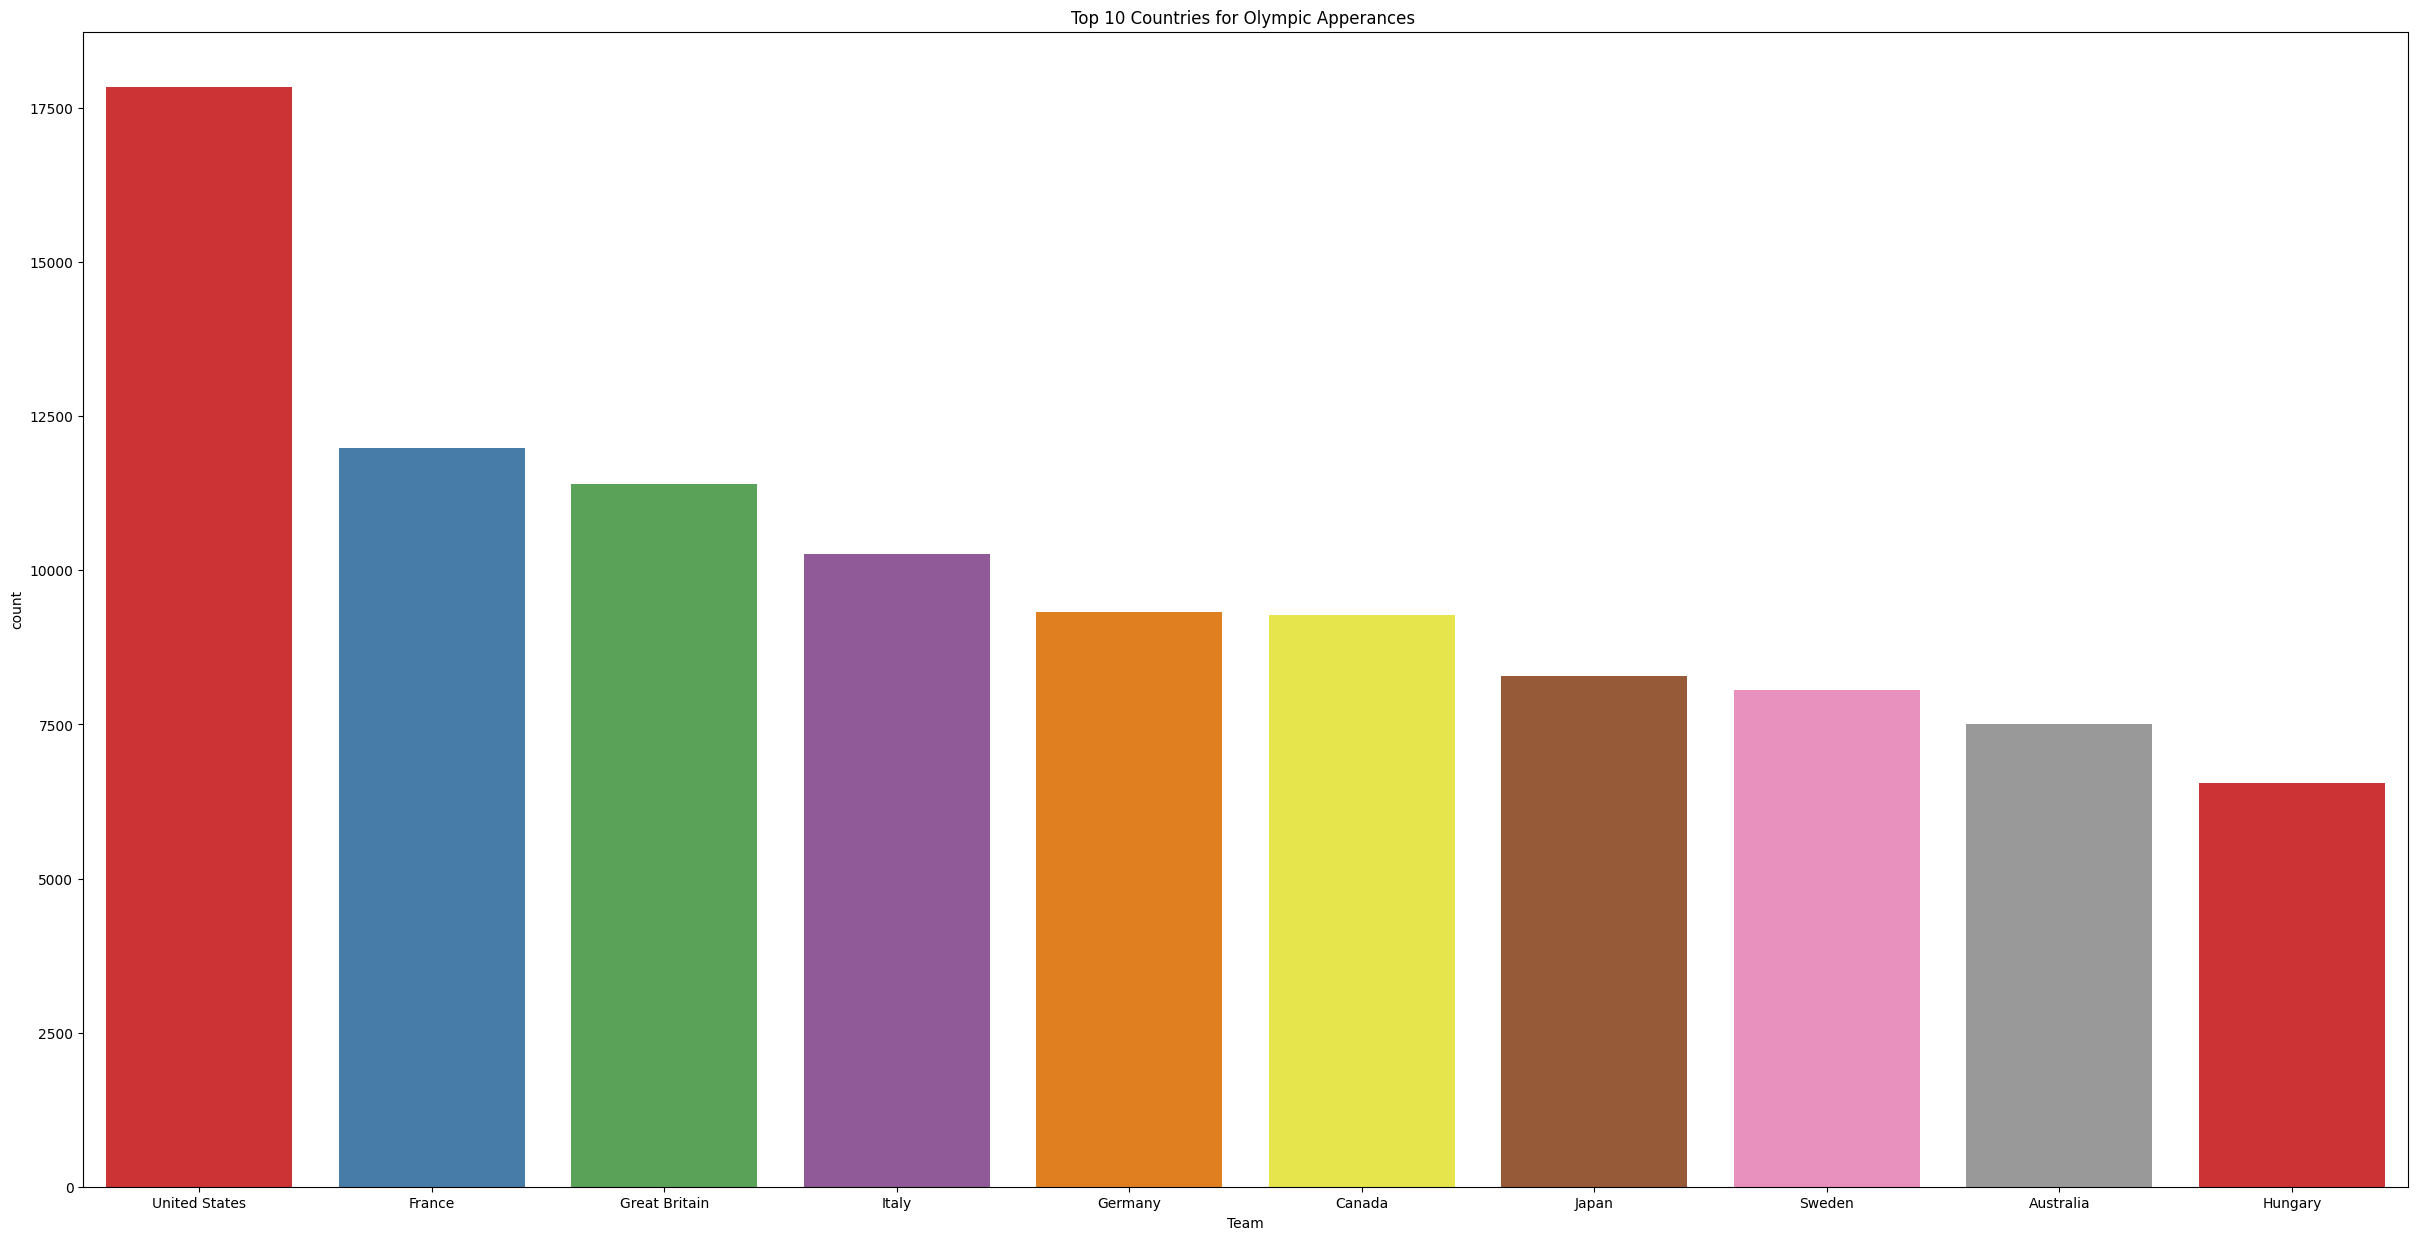

In [26]:
plt.figure(figsize=(30,15))
plt.title('Top 10 Countries for Olympic Apperances ')
sns.barplot( x = Top_10_countreis.index , y = Top_10_countreis , palette = 'Set1');

In [27]:
# Total Medals won by each country

medal_count = df.groupby('region')['Medal'].count().sort_values(ascending=False).head(5)
medal_count

region
USA        5637
Russia     3947
Germany    3756
UK         2068
France     1777
Name: Medal, dtype: int64

Text(0, 0.5, 'Number of medals')

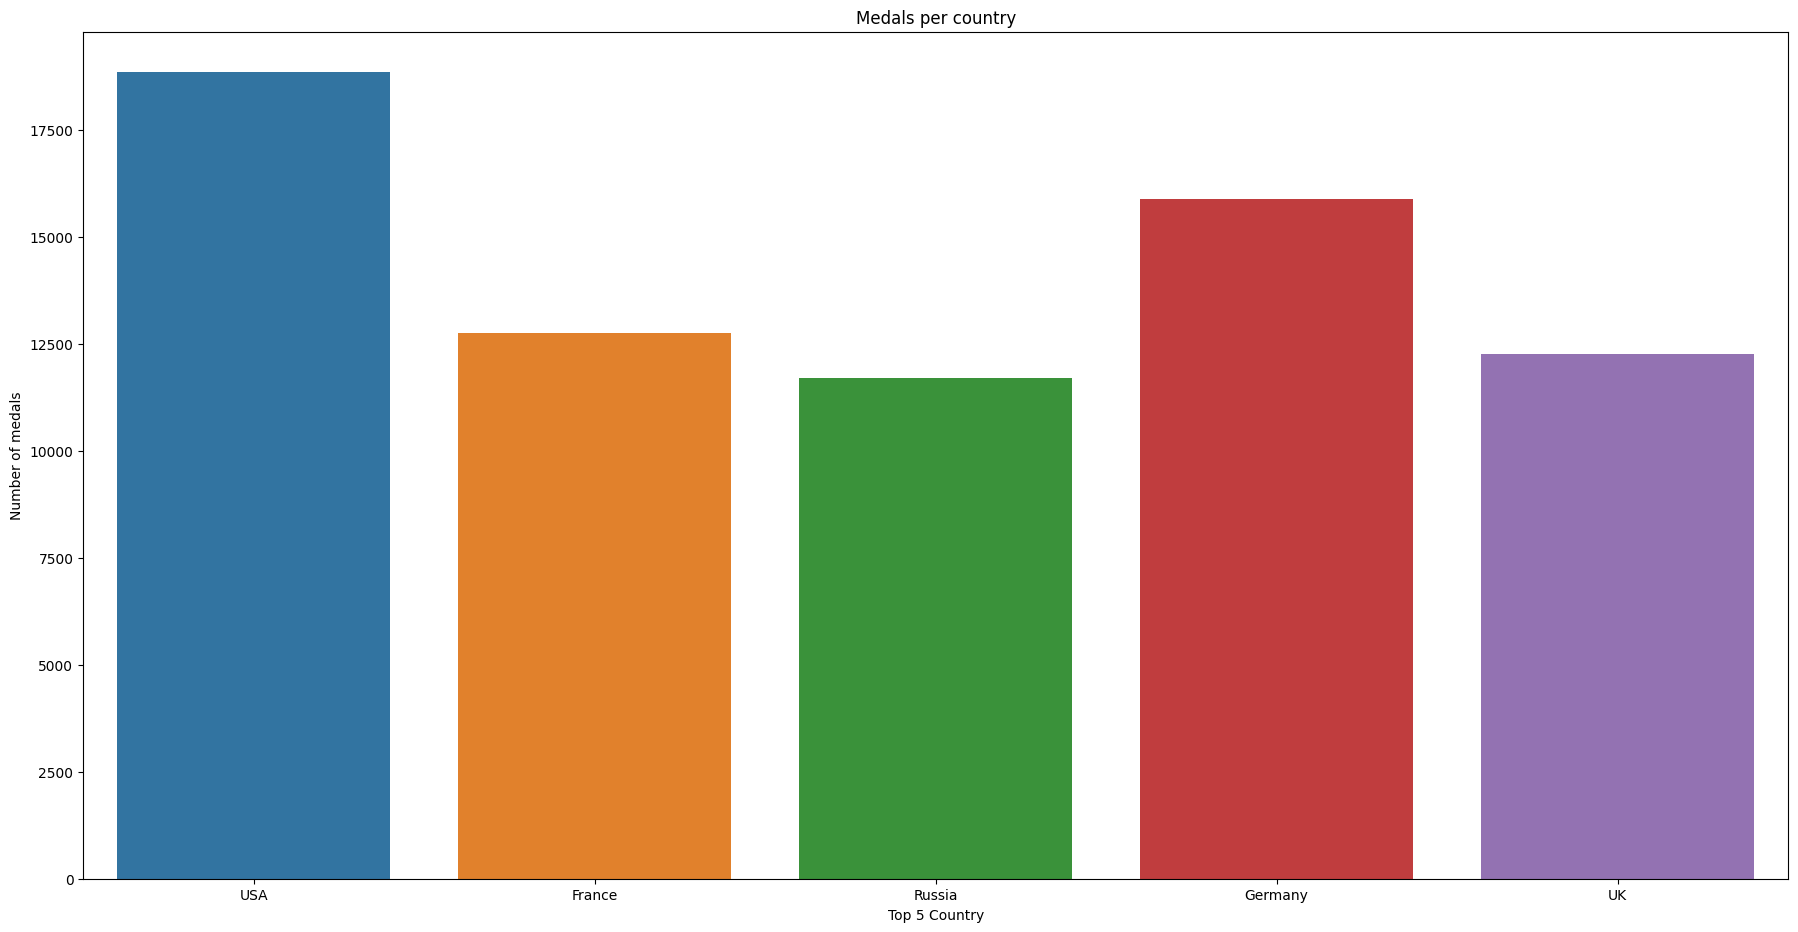

In [28]:
plt.figure(figsize= (22,11))
plt.tight_layout()
sns.countplot(data=df[df['region'].isin(medal_count.index)] , x ="region")
plt.title("Medals per country")
plt.xlabel("Top 5 Country")
plt.ylabel("Number of medals")

In [41]:
gold_medal=df[(df.Medal == 'Gold')]
gold_medal.tail(7)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
270934,135488,Nataliya Vladimirovna Zuyeva,F,19.0,176.0,62.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold,Russia,NaN
270970,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,39.0,183.0,100.0,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's Discus Throw,Gold,Belarus,NaN
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN
271076,135553,Galina Ivanovna Zybina (-Fyodorova),F,21.0,168.0,80.0,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,Russia,NaN


In [42]:
gold_medal.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        1
notes     13201
dtype: int64

## Distributions

In [43]:
# The distributions using seaborn ditrabution plots. 
age= df['Age']
height= df['Height']
weight= df['Weight']

Age distribution of the athletes 


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


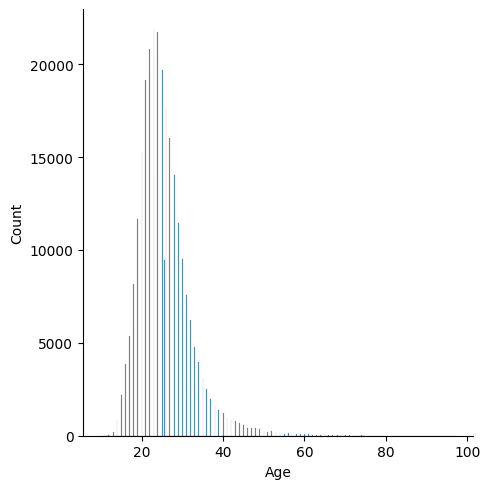

In [44]:
print('Age distribution of the athletes ')
sns.displot(df['Age'].dropna());


<Axes: xlabel='Age'>

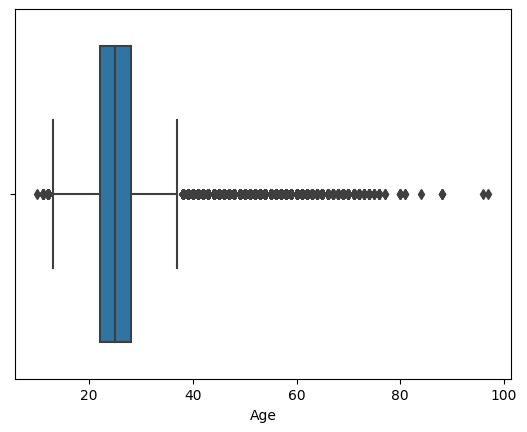

In [45]:
sns.boxplot(x=df['Age'].dropna()) 

The average age is between 20 - 30 years old and the mean is greater than median. The distrabution of Age is skewed to the right, and varys from about 10 -100.

In [46]:
# df.Team.value_counts().sort_values(ascending=False).head(10)
gold_medal.Age.value_counts().sort_values(ascending=False)

Age
23.000000    1136
24.000000    1135
22.000000    1096
25.000000    1056
26.000000     976
21.000000     925
27.000000     863
28.000000     802
20.000000     674
29.000000     649
30.000000     527
19.000000     459
31.000000     401
32.000000     357
33.000000     292
18.000000     280
34.000000     218
17.000000     199
35.000000     176
25.556898     148
36.000000     133
16.000000     116
38.000000      89
37.000000      81
15.000000      75
40.000000      74
39.000000      65
41.000000      43
42.000000      42
44.000000      38
43.000000      32
14.000000      27
46.000000      24
47.000000      24
48.000000      21
45.000000      20
54.000000      15
49.000000      15
52.000000      12
50.000000      12
56.000000      10
13.000000       7
53.000000       6
63.000000       4
51.000000       4
60.000000       4
58.000000       3
57.000000       2
59.000000       2
64.000000       2
55.000000       1
Name: count, dtype: int64

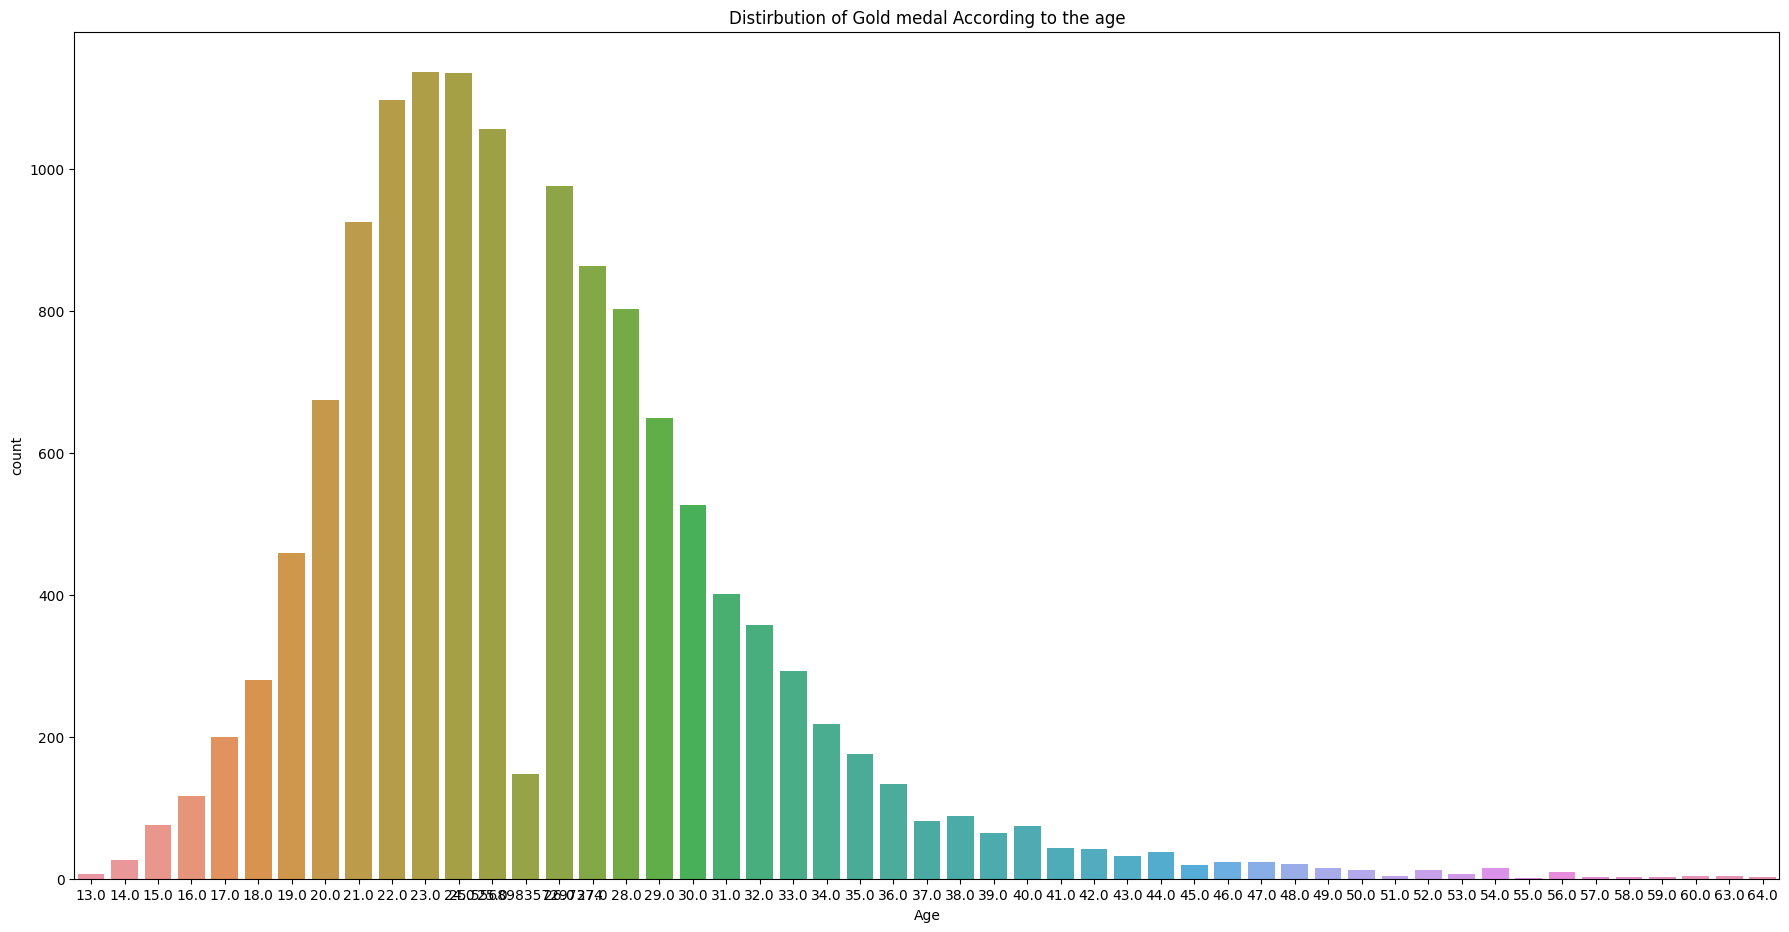

In [48]:
#Gold Medal distribution 

plt.figure(figsize= (22,11))
plt.tight_layout()
sns.countplot(data=gold_medal, x = 'Age')
plt.title("Distirbution of Gold medal According to the age")
plt.show()

<Axes: xlabel='Height'>

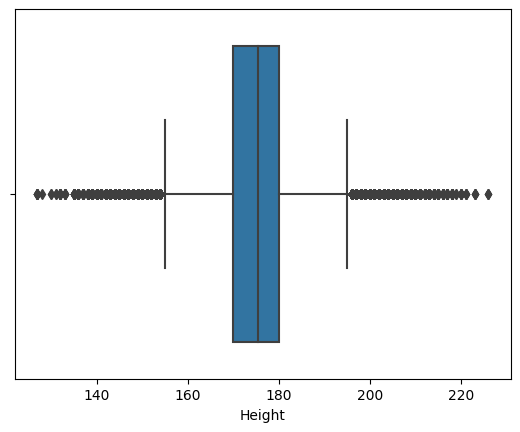

In [50]:
sns.boxplot(x=df['Height'].dropna()) 


The distrabution of height is normal, and the mean is equal to the median.

<Axes: xlabel='Weight'>

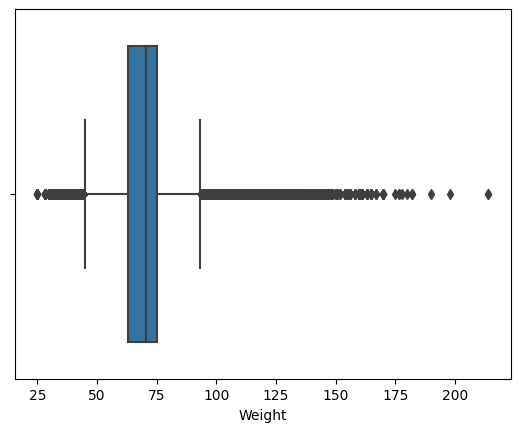

In [52]:
sns.boxplot(x=df['Weight'].dropna()) 

The distrabution of weight is not normal, but skewed to the right.

## Top Athletes in Olympics

In [54]:
top_atheletes = df.groupby(['Name','Sex'])['Medal'].count().sort_values(ascending = False)
top_atheletes.head(10)

Name                                Sex
Michael Fred Phelps, II             M      28
Larysa Semenivna Latynina (Diriy-)  F      18
Nikolay Yefimovich Andrianov        M      15
Ole Einar Bjrndalen                 M      13
Edoardo Mangiarotti                 M      13
Takashi Ono                         M      13
Borys Anfiyanovych Shakhlin         M      13
Natalie Anne Coughlin (-Hall)       F      12
Aleksey Yuryevich Nemov             M      12
Ryan Steven Lochte                  M      12
Name: Medal, dtype: int64

### Which athlete competed in the most number of events

In [55]:

# event not sport , value_counts 
name =(df['Name'].value_counts()).iloc[:1]

topname=' '.join(str(name).split()[1:4])

topname_country=df[df['Name']==topname]["Team"].iloc[0]



In [56]:
allnames= df.set_index('Name')
topname_df = allnames.loc["Robert Tait McKenzie"]
topname_df
events_df=topname_df[['Event','Year']] 

events_df.head()

,Event,Year
Name,,
Robert Tait McKenzie,Art Competitions Mixed Sculpturing,1912
Robert Tait McKenzie,"Art Competitions Mixed Sculpturing, Statues",1928
Robert Tait McKenzie,"Art Competitions Mixed Sculpturing, Statues",1928
Robert Tait McKenzie,"Art Competitions Mixed Sculpturing, Statues",1928
Robert Tait McKenzie,"Art Competitions Mixed Sculpturing, Statues",1928


In [57]:
events_df=events_df.set_index('Year')

print("From", events_df.index[0],' - ', events_df.index[-1], "the athlete who competed in the most number of events is: ")
print(topname, "from", topname_country)

From 1912  -  1948 the athlete who competed in the most number of events is: 
Robert Tait McKenzie from Canada


In [58]:
# Which sport has the highest median athlete age?


age_df=df[['Sport','Age']]
#For each sport, what is the median value, then sort by medians
sorted_median= ((age_df.groupby('Sport').median()).sort_values('Age', ascending =False))

print("The sport with the highiest median age is",(sorted_median.index[0]),
      'with a median age of',(sorted_median['Age'].iloc[0]))

The sport with the highiest median age is Roque with a median age of 48.0


In [59]:
winter_sports=df[df.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [60]:
Summer_sports=df[df.Season=='Summer'].Sport.unique()
Summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

## Women In Olympics

In [61]:
# male and female participants
gender_counts = df.Sex.value_counts()
gender_counts

Sex
M    196594
F     74522
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f4d71e65780>,
 [Text(0.20089640434146097, -1.081499253223354, 'M'),
  Text(-0.2008963030841931, 1.081499272032628, 'F')],
 [Text(0.10957985691352415, -0.5899086835763748, '72.5%'),
  Text(-0.10957980168228713, 0.5899086938359788, '27.5%')])

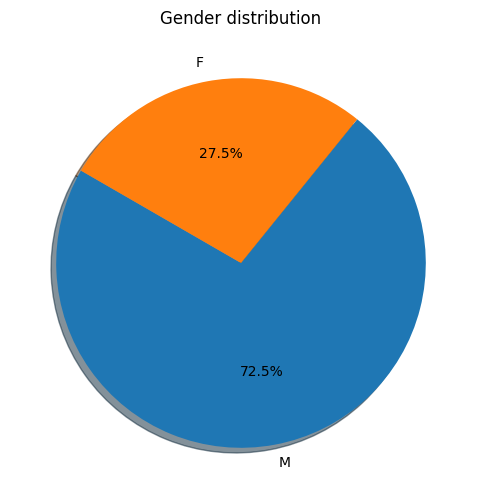

In [62]:
plt.figure(figsize=(12,6))
plt.title('Gender distribution')
plt.pie(gender_counts, autopct='%1.1f%%', labels=gender_counts.index, startangle=150, shadow=True)


In [63]:
df['Medal'].value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

### Which countries have more female medalists than male medalists

In [64]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [65]:
females_df= df[df['Sex']=='F']

males_df=df[df['Sex']=='M']

In [66]:
medal_df = df.dropna(subset=['Medal'])
female_male_df = (medal_df.groupby(['region','Sex']).size().to_frame().unstack(level=-1).fillna(0))[0]
female_male_df["MoreFemales"] = female_male_df["F"]> female_male_df['M']
female_male_df= (female_male_df.sort_values(by="MoreFemales",ascending= False))

In [67]:
print('Countries that have more female medalists than male medalists:')
female_male_df[female_male_df['MoreFemales']==True]

Countries that have more female medalists than male medalists:


Sex,F,M,MoreFemales
region,,,
Zimbabwe,22.0,0.0,True
Belarus,77.0,62.0,True
Costa Rica,4.0,0.0,True
China,656.0,337.0,True
Peru,12.0,3.0,True
Jamaica,86.0,71.0,True
Mozambique,2.0,0.0,True
North Korea,34.0,33.0,True
Ukraine,105.0,94.0,True


In [ ]:
region_df

In [69]:
print ('count of female medalist in Summer Olympic seasons:')
female_participants = df[(df.Sex=='F')&(df.Season=='Summer')][['Sex',"Year"]]
female_participants = female_participants.groupby("Year").count().reset_index()
female_participants

count of female medalist in Summer Olympic seasons:


,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


Text(0.5, 1.0, 'women participation in Summer Olympics')

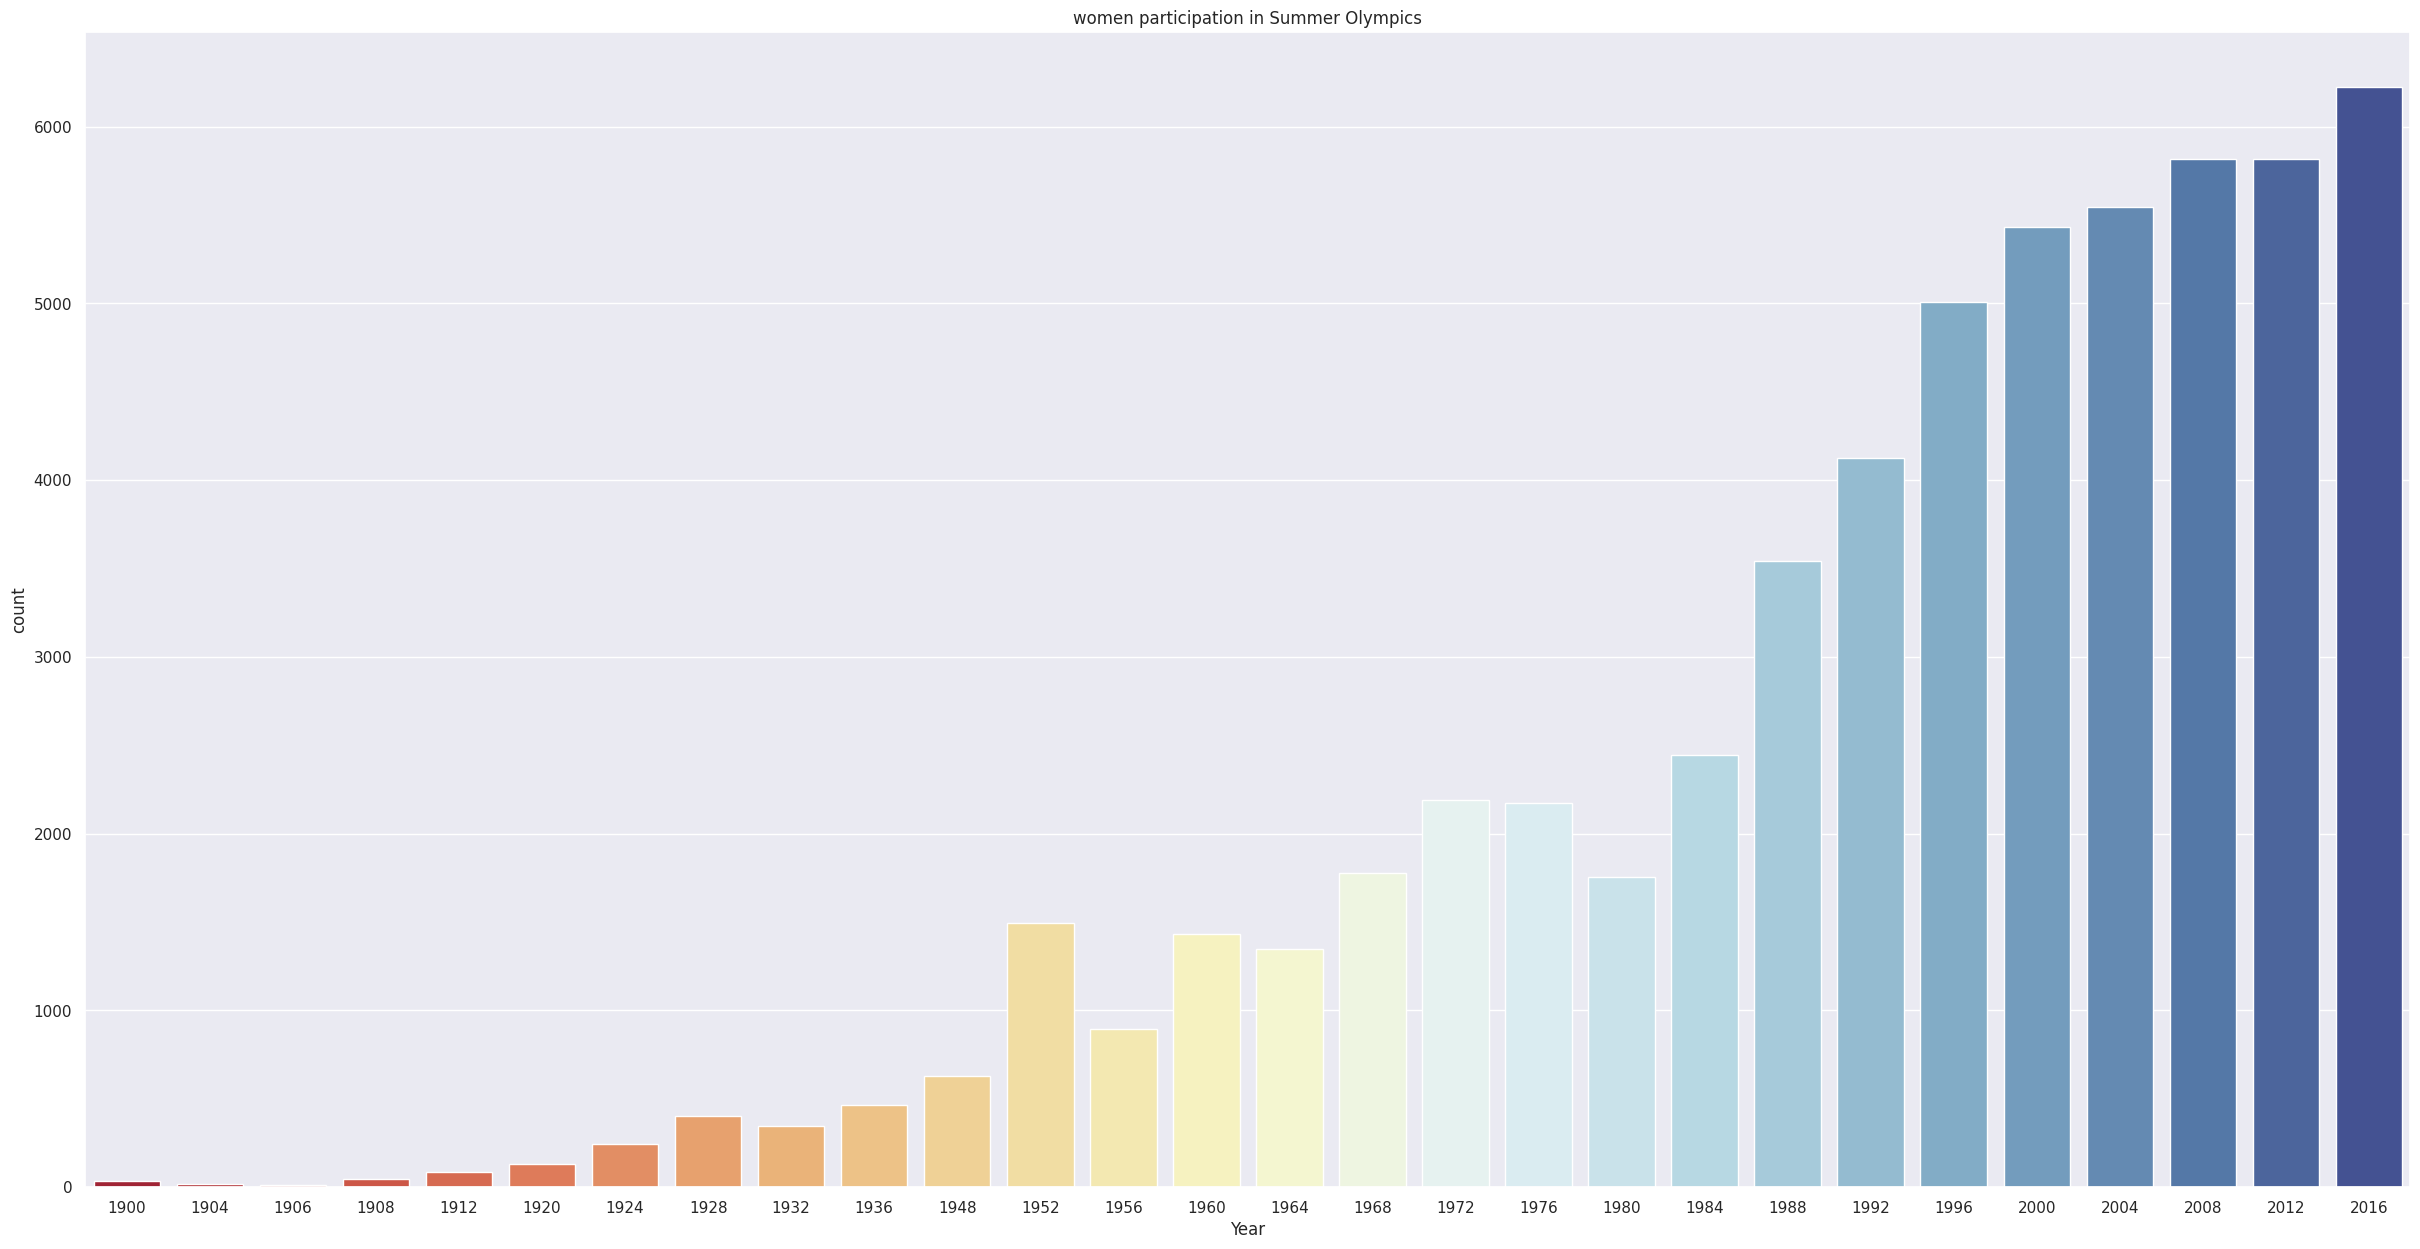

In [70]:
Women_Olympics=df[(df.Sex=='F')&(df.Season=='Summer')]

sns.set(style="darkgrid")
plt.figure(figsize=(30,15))
sns.countplot(x='Year', data=Women_Olympics, palette='RdYlBu')
plt.title('women participation in Summer Olympics')


Text(0.5, 1.0, 'plot of females athletes through time')

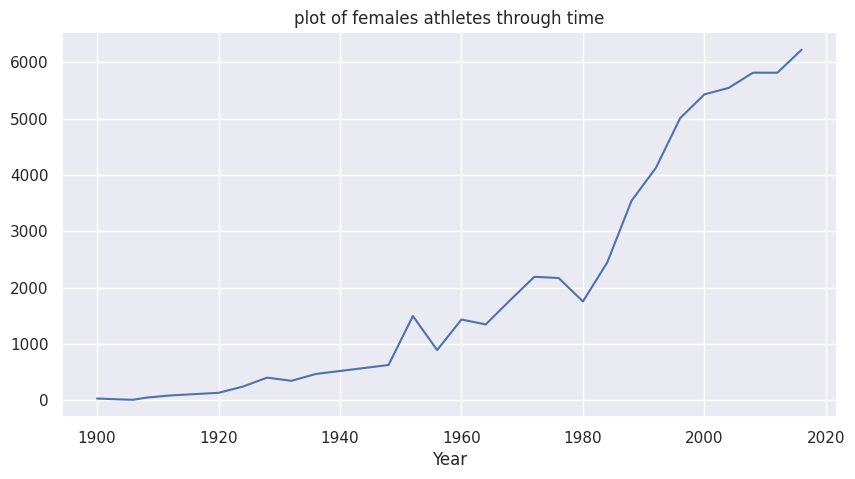

In [71]:
part=Women_Olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(10,5))
part.loc[:,'F'].plot()
plt.title('plot of females athletes through time')

### Gold Medals Analysis 

In [72]:
gold_medals=df[df.Medal=='Gold']
gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.00000,64.000000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.00000,85.000000,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [73]:
gold_medals = gold_medals[np.isfinite(gold_medals['Age'])]

In [77]:
# gold medals from each country 
gold_medals.region.value_counts().reset_index(name='Medal').head(6)

,region,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501


Text(0.5, 1.0, 'Medal Counts for Top 5 Countries')

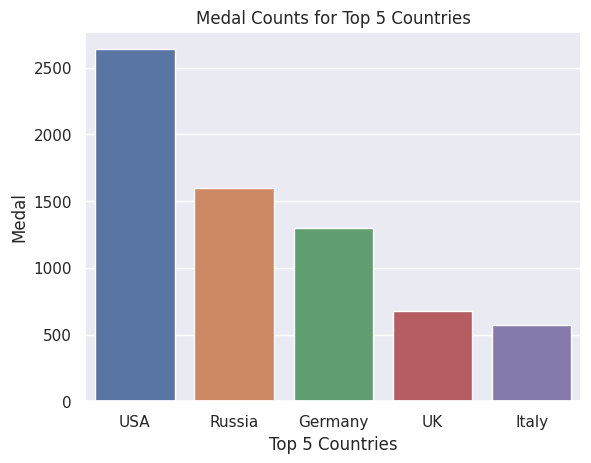

In [88]:
total_gold_models = gold_medals.region.value_counts().reset_index(name='Medal').head(5)
sns.barplot(total_gold_models, x="region", y="Medal")
plt.xlabel("Top 5 Countries")
plt.ylabel("Medal")  # Adjust labels as needed
plt.title("Medal Counts for Top 5 Countries")

In [86]:
max_year=df.Year.max()
max_year
print ('Top 10 countries gold medal count for Summer 2016:')
team_names=df[(df.Year==max_year)&(df.Medal=="Gold")].Team
team_names.value_counts().head(10)

Top 10 countries gold medal count for Summer 2016:


Team
United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 20 Countries by Medal Count in 2016')

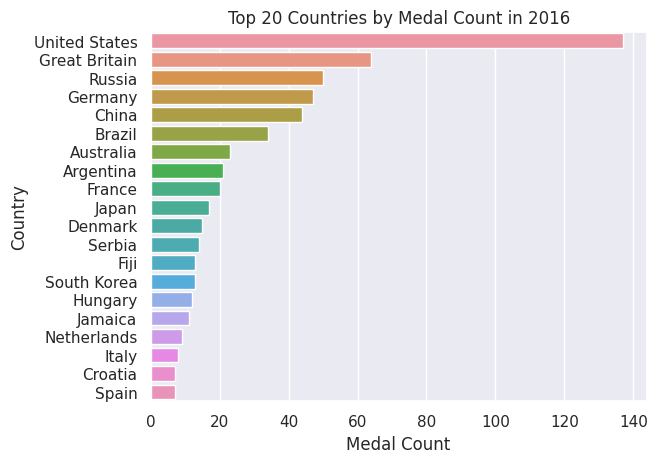

In [87]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.xlabel('Medal Count')
plt.ylabel('Country')
plt.title('Top 20 Countries by Medal Count in 2016')

Which country won the most medal points in the 2014 Winter Olympics? Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.


In [82]:
def medal_score(n):
    if n=="Gold":
        return 3
    elif n == "Silver":
        return 2 
    elif n== "Bronze":
        return 1 
    
df["Score"]=df["Medal"].apply(medal_score)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Score
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,NaN
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,3.0
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,NaN


In [83]:
yr_2014=df[df["Games"]=="2014 Winter"].drop(['Age', 'ID','Height','Weight'], axis=1)

yr_2014.head()

,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Score
40,Juhamatti Tapio Aaltonen,M,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN,1.0
252,Forough Abbasi,F,Iran,IRI,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Slalom,NaN,Iran,NaN,NaN
277,Jeremy Abbott,M,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Men's Singles,NaN,USA,NaN,NaN
278,Jeremy Abbott,M,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze,USA,NaN,1.0
809,Agnese boltia,F,Latvia,LAT,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Women's Super G,NaN,Latvia,NaN,NaN


In [84]:
top_medal_countries =(yr_2014.groupby('region').sum().sort_values(by="Score",ascending=False).reset_index()
                     ).set_index('region')
top_10= top_medal_countries.iloc[:11]
top=top_10.index[0]
top
print(top,"is the country with the most medals in the 2014 Winter Olympics.")

top_medal_countries.Score.head(10)

Canada is the country with the most medals in the 2014 Winter Olympics.


region
Canada         226.0
Russia         156.0
USA            114.0
Sweden          99.0
Germany         78.0
Norway          77.0
Netherlands     62.0
Austria         47.0
Switzerland     46.0
Finland         44.0
Name: Score, dtype: float64

Text(0.5, 1.0, 'Height vs Weights of Olympic Medalists')

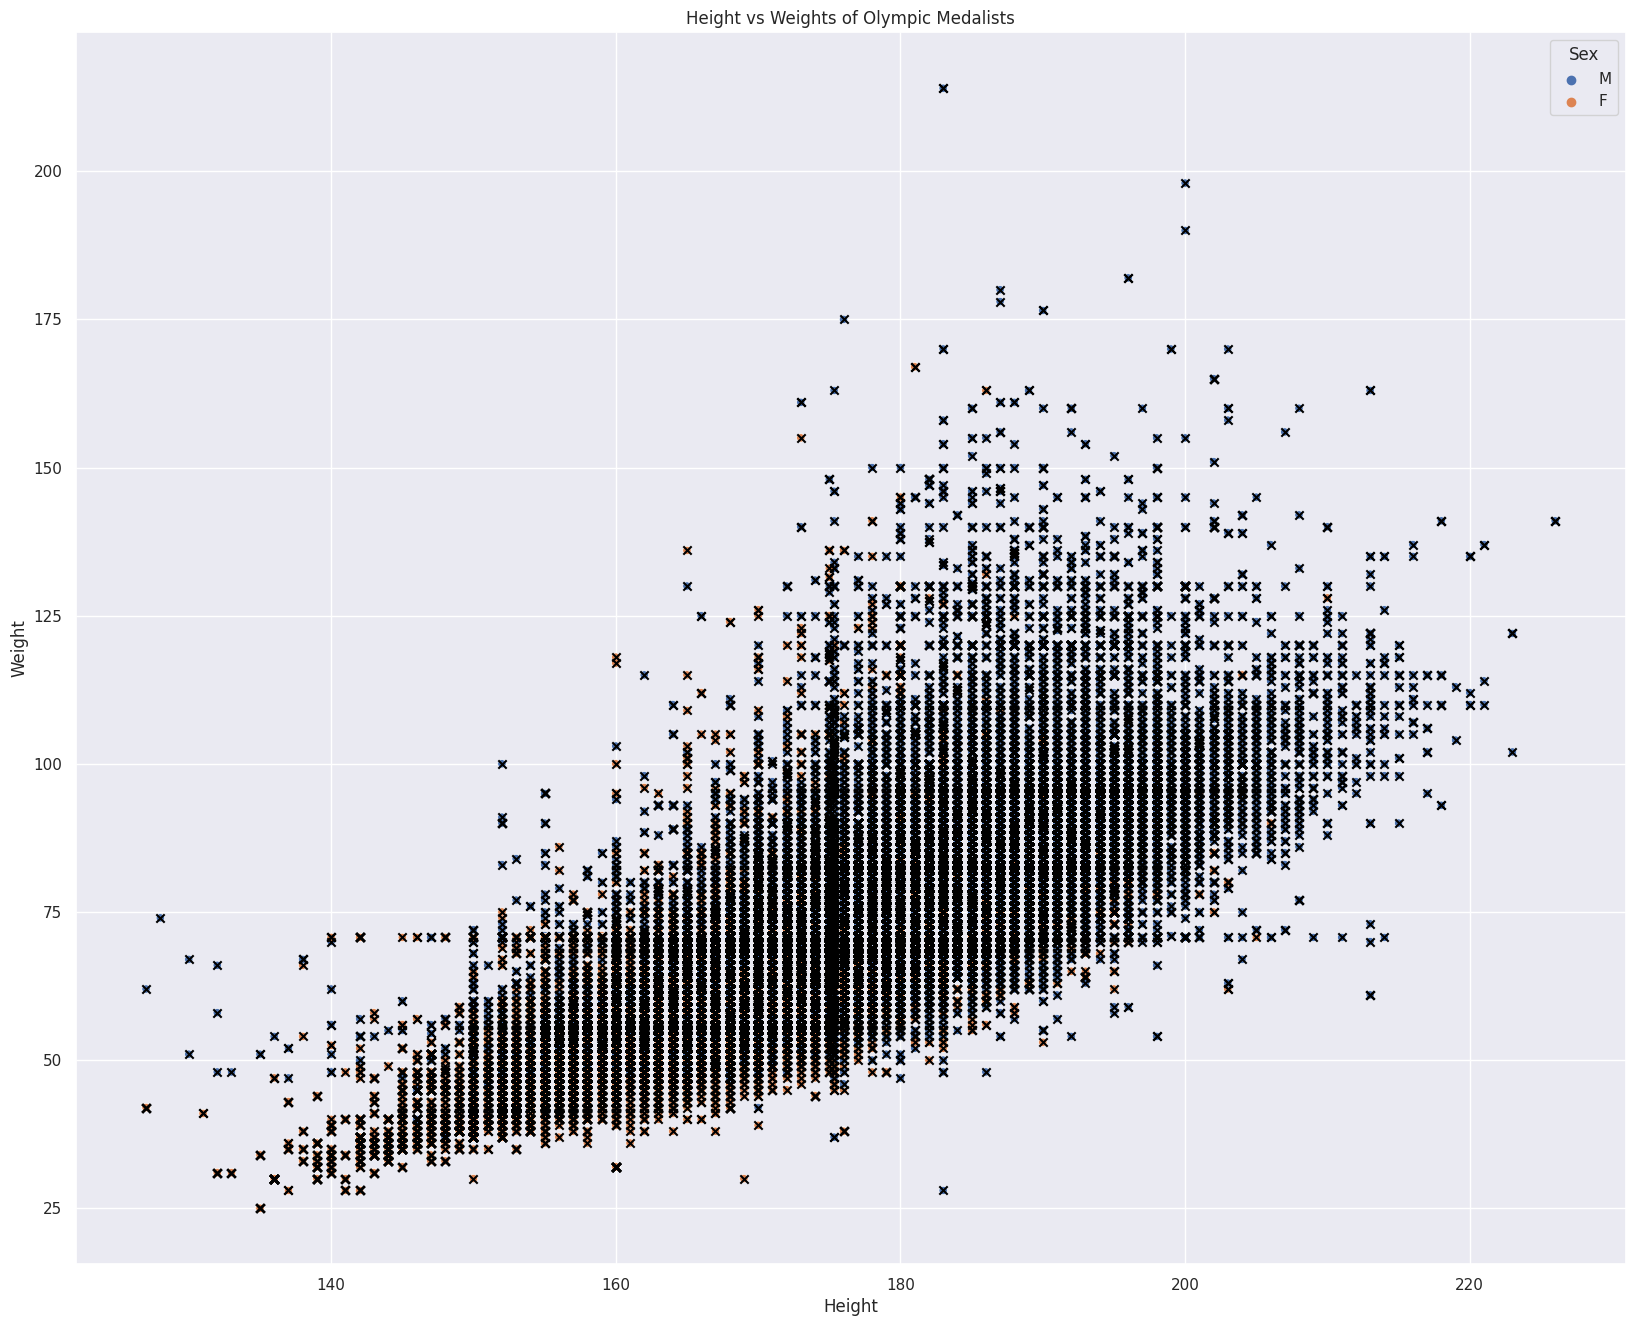

In [85]:
non_null_medals = df[(df['Height'].notnull()) & (df['Weight'].notnull())]
plt.figure(figsize=(20, 16))
axis = sns.scatterplot(x='Height', y='Weight', data=non_null_medals, hue='Sex')

marker_style = 'x'  
axis.scatter(non_null_medals['Height'], non_null_medals['Weight'], marker=marker_style, c='black')

plt.title('Height vs Weights of Olympic Medalists')

Conclusion

We've accomplished a comprehensive exploratory analysis of a 120-year dataset encompassing Olympic events. This journey provided valuable insights into the evolution of sports, athlete demographics, and performance trends over the years, contributing to a richer understanding of the dynamic landscape of the Olympic Games.